In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder




In [6]:
df=pd.read_csv("tic-tac-toe.data.csv")
df.head()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [10]:
# ------------------  Encode all categorical columns -----------------------------
leb = LabelEncoder()
for column in df.columns:
    df[column] = leb.fit_transform(df[column])

print(df["top-left-square"])
print(df["top-middle-square"])

0      2
1      2
2      2
3      2
4      2
      ..
953    1
954    1
955    1
956    1
957    1
Name: top-left-square, Length: 958, dtype: int64
0      2
1      2
2      2
3      2
4      2
      ..
953    2
954    2
955    2
956    2
957    1
Name: top-middle-square, Length: 958, dtype: int64


In [13]:
# ----------------------------- Split features and target ------------------------------
X = df.drop('Class', axis=1)
y = df['Class']

# -------------------------------- Train-test split -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------  Train the Decision Tree -----------------------
model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [14]:
# ------------------ Predict -------------------------
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7708333333333334
              precision    recall  f1-score   support

           0       0.73      0.55      0.63        67
           1       0.79      0.89      0.83       125

    accuracy                           0.77       192
   macro avg       0.76      0.72      0.73       192
weighted avg       0.77      0.77      0.76       192



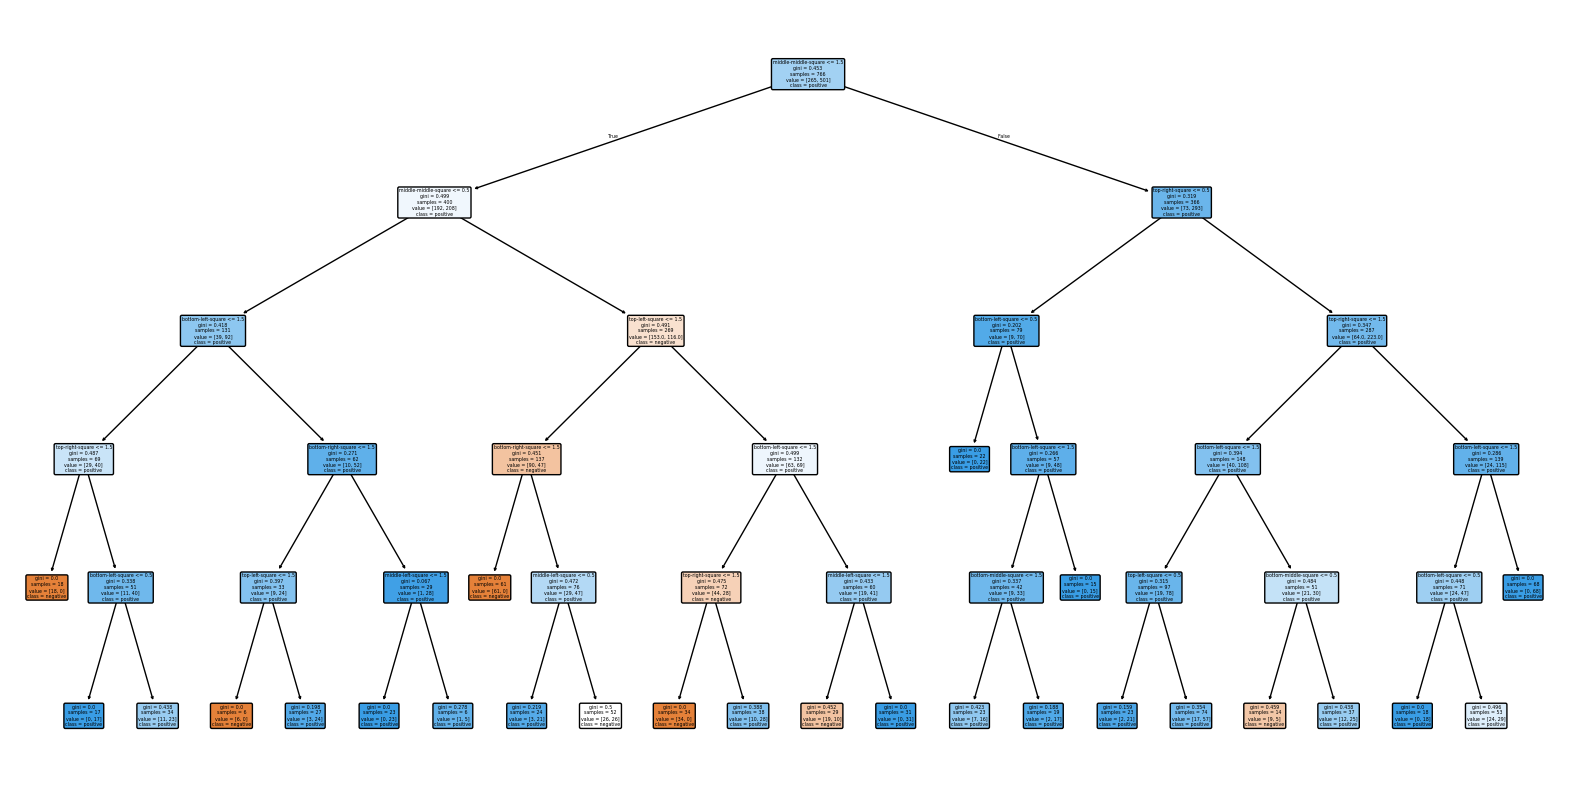

In [15]:
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['negative', 'positive'], filled=True, rounded=True)
plt.show()

In [17]:
import math
from collections import Counter

def entropy(data):
    labels = [row[-1] for row in data]
    total = len(labels)
    counts = Counter(labels)
    ent = 0
    for count in counts.values():
        p = count / total
        ent -= p * math.log2(p)
    return ent

def info_gain(data, feature_index):
    total_entropy = entropy(data)
    values = set(row[feature_index] for row in data)
    weighted_entropy = 0
    total_len = len(data)
    for val in values:
        subset = [row for row in data if row[feature_index] == val]
        weighted_entropy += (len(subset) / total_len) * entropy(subset)
    return total_entropy - weighted_entropy

# Sample data: [feature1, feature2, ..., label]
data = [
    ['Sunny', 'Hot', 'No'],
    ['Sunny', 'Hot', 'No'],
    ['Overcast', 'Hot', 'Yes'],
    ['Rain', 'Mild', 'Yes'],
    ['Rain', 'Cool', 'Yes'],
]

print("Entropy of full data:", entropy(data))
print("Information Gain of feature 0:", info_gain(data, 0))
print("Information Gain of feature 1:", info_gain(data, 1))


Entropy of full data: 0.9709505944546686
Information Gain of feature 0: 0.9709505944546686
Information Gain of feature 1: 0.4199730940219749
